### Показательные графики

In [2]:
import matplotlib.pyplot as plt

In [7]:
from search.map import Map
from search.Node import Node
from search.algorithms import AStar
import random
import time

In [55]:
EPS = 0.01
N = 150

def read_scen(path):
    tasks = []
    with open('scen/' + path + '.map.scen') as taskFile:
        lines = taskFile.readlines()[1:]
    for line in lines:
        coord = line.split()
        tasks.append({'y_start': int(coord[-5]), 'x_start': int(coord[-4]), 'y_end': int(
            coord[-3]), 'x_end': int(coord[-2]), 'cost': float(coord[-1])})
    return random.sample(tasks, N)

In [56]:
file_name = 'Berlin_0_256'

In [57]:
tasks_file = {}
tasks_file[file_name] = read_scen(file_name)

k = 0
time_list = []
cost_list = []

gridded_map = Map('maps/' + file_name + '.map')
astar = AStar(gridded_map)

Node.Cut_corners = True

tasks = tasks_file[file_name]
for task in tasks:
    start = Node(task['x_start'], task['y_start'])
    end = Node(task['x_end'], task['y_end'])
    start_time = time.time()
    ans, cost = astar.search(start, end)
    end_time = time.time()
    astar_time = end_time - start_time
    time_list.append(astar_time)
    cost_list.append(cost)

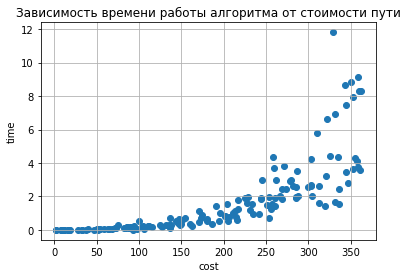

In [58]:
plt.scatter(cost_list, time_list)
plt.grid(True)
plt.xlabel('cost')
plt.ylabel('time')
plt.title('Зависимость времени работы алгоритма от стоимости пути')
plt.savefig('plot.png',facecolor = 'white')